## First Training Loop

In [2]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import fetch_lfw_people, load_digits

In [3]:
dataset = load_digits()
# dataset = fetch_lfw_people()  # We didn't talk about this
images = dataset['images']
X_numpy = dataset['data']
y_numpy = dataset['target']
X = torch.Tensor(X_numpy)
y = torch.LongTensor(y_numpy)
X.shape

torch.Size([1797, 64])

tensor(0)

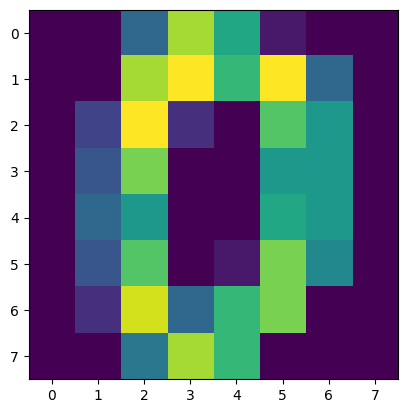

In [5]:
#visualize one sample from the data
import matplotlib.pyplot as plt

plt.imshow(images[0])
y[0] # label correspondent to the first element in the dataset

In [9]:
# create Dataloader to iterate over the dataset
dataset = torch.utils.data.TensorDataset(X,y)
training_set = torch.utils.data.DataLoader(dataset, batch_size = 50)

In [20]:
# create model (Linear model)
model = nn.Sequential(
    nn.Linear(64, 10),
    # nn.ReLU(),
    # nn.Linear(1000, 10),
    # nn.Softmax()
)
model.named_parameters

<bound method Module.named_parameters of Sequential(
  (0): Linear(in_features=64, out_features=10, bias=True)
)>

In [21]:
# model parameters
for name, x in model.named_parameters():
    print(name, x.shape)

0.weight torch.Size([10, 64])
0.bias torch.Size([10])


In [22]:
outputs = model(X[0])
outputs  # Output on first image

tensor([ 1.6213, -9.0059, -2.2241,  4.0778,  4.8689, -2.5903,  1.8116,  1.9598,
         5.9021, -0.9943], grad_fn=<ViewBackward0>)

In [23]:
# loss functions
log_loss = nn.NLLLoss()
cross_entropy = nn.CrossEntropyLoss()
binary_cross_entropy = nn.BCELoss()

In [24]:
# optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [25]:
# define training function
def train(data, model, loss_f, optimizer, n_epochs = 10):
  for epoch in range(1,n_epochs+1):
    for inputs, targets in data:
      outputs = model(inputs)
      loss = loss_f(outputs, targets)

      optimizer.zero_grad()

      # check that here every parameter have gradient 0
      """for x in model[0].parameters():
          print(x.shape, x.grad.sum())"""

      loss.backward()

      # after propagating the error the dradient is updated for each parameter of the model
      """for x in model[0].parameters():
          print(x.grad.sum())"""

      # optimizer step to update parameters value
      optimizer.step()

      # check that the error decrease after optimizer step
      # with torch.no_grad():
      #   outputs = model(inputs)
      #   loss_after = loss_f(outputs, targets)
      #   print(f"loss before optimizer step {loss}\n loss after optimizer step {loss_after}")

    predictions = model(X).argmax(axis = 1)
    print(f"Epoch {epoch} training accuracy={(predictions == y).float().mean().item():.3f}")
  return predictions



In [26]:
predictions = train(training_set, model, cross_entropy, optimizer)

Epoch 1 training accuracy=0.864
Epoch 2 training accuracy=0.897
Epoch 3 training accuracy=0.920
Epoch 4 training accuracy=0.955
Epoch 5 training accuracy=0.932
Epoch 6 training accuracy=0.935
Epoch 7 training accuracy=0.958
Epoch 8 training accuracy=0.934
Epoch 9 training accuracy=0.928
Epoch 10 training accuracy=0.962


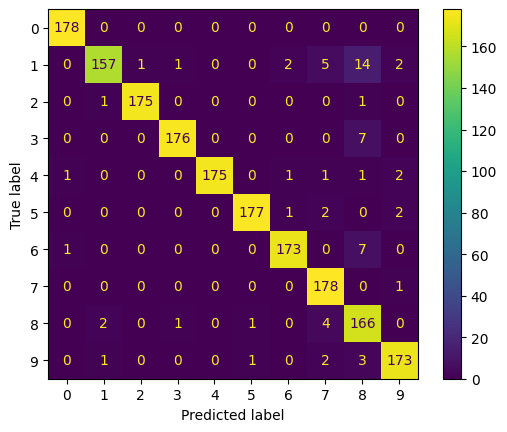

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y, predictions)

In [28]:
# Visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def plot_2d(matrix, colors):
    """
    Projecting along the first two principal components (having largest eigenvalue)
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(matrix)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, marker='.')

def plot_tsne(matrix, colors):
    """
    Non-linear projection called t-distributed stochastic neighbor embedding (t-SNE).
    """
    tsne = TSNE(init='pca')
    X_tsne = tsne.fit_transform(matrix)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, marker='.')

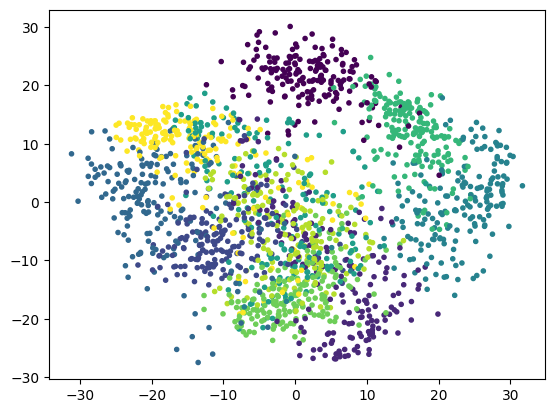

In [29]:
plot_2d(X, y)

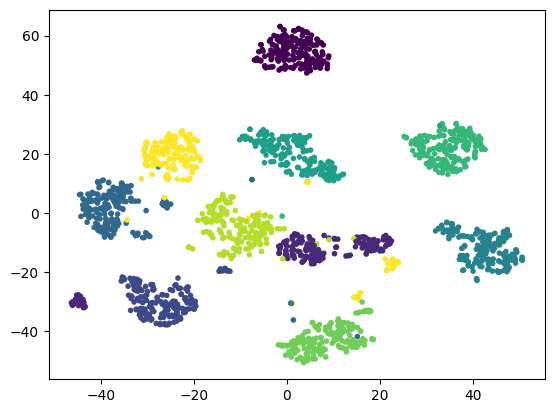

In [30]:
plot_tsne(X_numpy, y)  # Colors are just there for visualization, not for learning those low-dim embeddings